In [1]:
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_csv('dailyActivity_merged.csv')
# Display the first few rows of the DataFrame
print(df.head())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

In [2]:

print(df.isnull().sum())
print(df.info())


Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    

In [3]:
# Group by 'Id' and calculate the total steps and calories for each user
user_summary = df.groupby('Id').agg({'TotalSteps': 'sum', 'Calories': 'sum'}).reset_index()


In [4]:
# Convert 'ActivityDate' to a datetime object
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
print(df.info())
# Extract year and month from 'ActivityDate'
df['Year'] = df['ActivityDate'].dt.year
df['Month'] = df['ActivityDate'].dt.month


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [29]:
# First, aggregate the data by summing 'TotalSteps' for each 'Id' and 'Month'
agg_df = df.groupby(['Id', 'Month'])['TotalSteps'].sum().reset_index()

# Now, pivot the aggregated data
pivot_table = agg_df.pivot(index='Id', columns='Month', values='TotalSteps').fillna(0)
print(pivot_table)


Month              4         5
Id                            
1503960366  238807.0  136812.0
1624580081  110060.0   68001.0
1644430081  142055.0   76434.0
1844505072   68989.0   10993.0
1927972279   15193.0   13207.0
2022484408  226934.0  125556.0
2026352035   90894.0   81679.0
2320127002   92151.0   54072.0
2347167796  171354.0       0.0
2873212765  145123.0   89106.0
3372868164  134156.0    3077.0
3977333714  197080.0  132457.0
4020332650   12589.0   57695.0
4057192912   15352.0       0.0
4319703577  130943.0   94391.0
4388161847  192846.0  142386.0
4445114986   86263.0   62430.0
4558609924  153974.0   84265.0
4702921684  166683.0   99051.0
5553957443  167030.0   99960.0
5577150313  183247.0   65886.0
6117666160  148158.0   49150.0
6290855005  103392.0   60445.0
6775888955   56352.0    9160.0
6962181067  197483.0  106156.0
7007744171  234789.0   59620.0
7086361926  160918.0  129607.0
8053475328  309238.0  148424.0
8253242879  123161.0       0.0
8378563200  184488.0   85761.0
85838150

In [30]:
# Create a second DataFrame with additional user information
user_info = pd.DataFrame({'Id': [1503960366, 1234567890], 'UserName': ['User1', 'User2']})

# Merge the two DataFrames based on 'Id'
merged_df = df.merge(user_info, on='Id', how='left')
print(user_info)
print("\n\n")
print(merged_df)



           Id UserName
0  1503960366    User1
1  1234567890    User2



             Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActi

In [7]:
# Define a custom function to categorize activity levels based on 'TotalSteps'
def categorize_activity(total_steps):
    if total_steps < 5000:
        return 'Low'
    elif total_steps < 10000:
        return 'Moderate'
    else:
        return 'High'

# Apply the custom function to create a new column
df['ActivityLevel'] = df['TotalSteps'].apply(categorize_activity)


In [8]:
# Calculate summary statistics
summary_stats = df[['TotalSteps', 'Calories']].describe()
print(summary_stats)


         TotalSteps     Calories
count    940.000000   940.000000
mean    7637.910638  2303.609574
std     5087.150742   718.166862
min        0.000000     0.000000
25%     3789.750000  1828.500000
50%     7405.500000  2134.000000
75%    10727.000000  2793.250000
max    36019.000000  4900.000000


In [9]:
# Group by 'Id' and calculate the total steps for each user
user_total_steps = df.groupby('Id')['TotalSteps'].sum().reset_index()

# Sort by total steps in descending order and select the top 5 users
top_5_users = user_total_steps.sort_values(by='TotalSteps', ascending=False).head(5)
print(top_5_users)


            Id  TotalSteps
32  8877689391      497241
27  8053475328      457662
0   1503960366      375619
5   2022484408      352490
15  4388161847      335232


In [10]:
# Group by 'Year' and 'Month' and calculate the average steps per day
avg_steps_by_month = df.groupby(['Year', 'Month'])['TotalSteps'].mean().reset_index()
print(avg_steps_by_month)


   Year  Month   TotalSteps
0  2016      4  7811.327332
1  2016      5  7315.851064


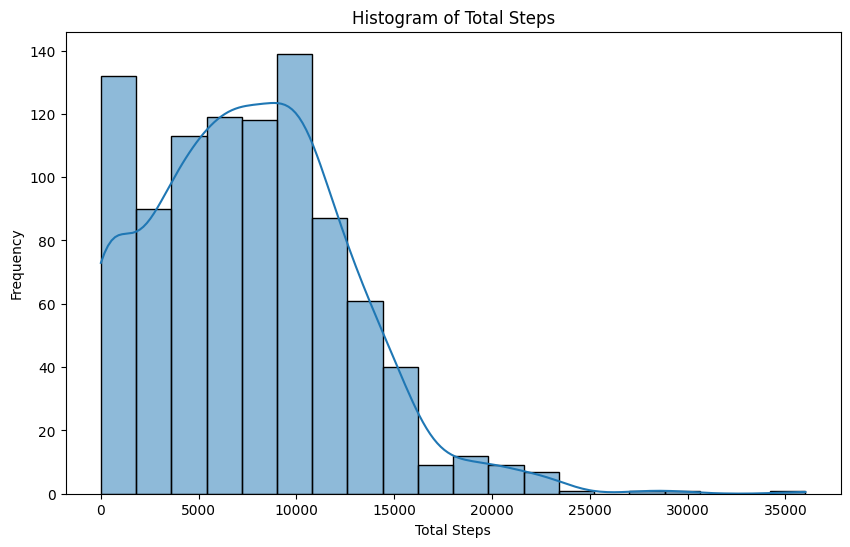

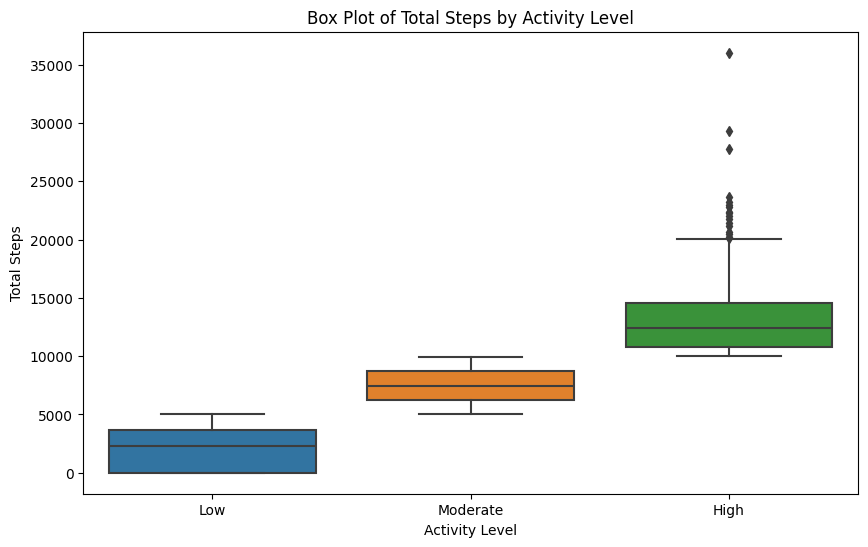

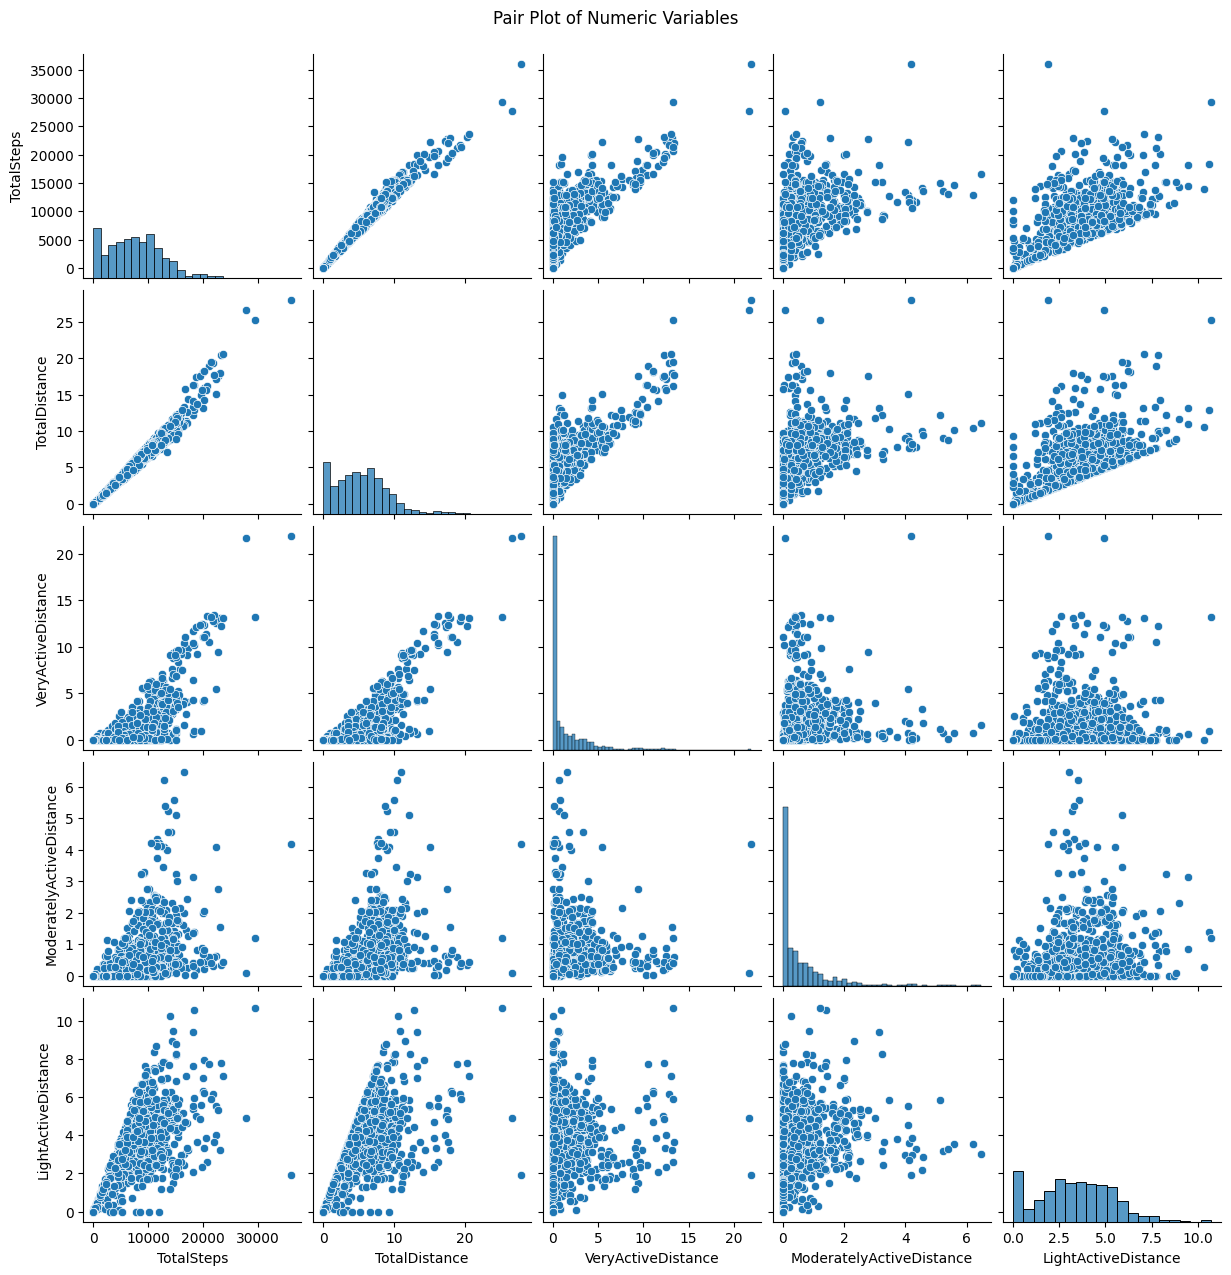

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


# Set a seaborn style (optional)
#sns.set_style('whitegrid')

# Visualization 1: Histogram of Total Steps
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalSteps', bins=20, kde=True)
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Total Steps')
plt.show()

# Visualization 2: Box Plot of Total Steps by Activity Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ActivityLevel', y='TotalSteps', order=['Low', 'Moderate', 'High'])
plt.xlabel('Activity Level')
plt.ylabel('Total Steps')
plt.title('Box Plot of Total Steps by Activity Level')
plt.show()

# Visualization 3: Pair Plot of Numeric Variables
numeric_vars = ['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']
sns.pairplot(df[numeric_vars])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()


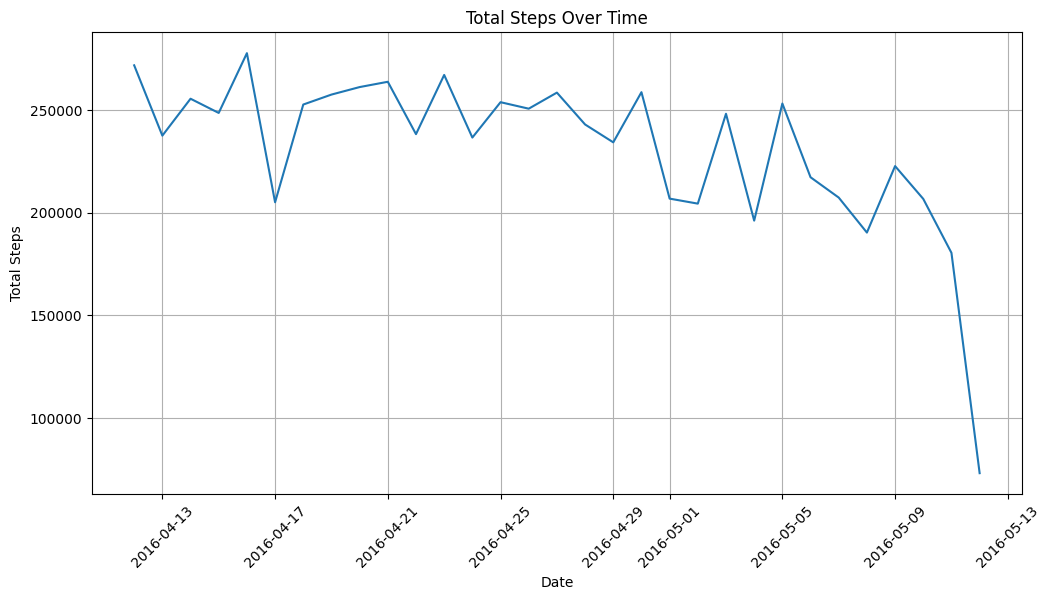

In [12]:

# Group by 'ActivityDate' and calculate the total steps for each date
daily_steps = df.groupby('ActivityDate')['TotalSteps'].sum()

# Plot the trend of total steps over time
plt.figure(figsize=(12, 6))
plt.plot(daily_steps.index, daily_steps.values)
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.title('Total Steps Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [23]:
import plotly.graph_objects as go

# Calculate the average minutes for each activity level
activity_means = df[["VeryActiveMinutes", "FairlyActiveMinutes", 
                     "LightlyActiveMinutes", "SedentaryMinutes"]].mean()

# Define labels, values, and colors
labels = activity_means.index
values = activity_means.values
colors = ['gold', 'red', 'brown', 'neon']

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4, textinfo='label+percent')])

# Customize the layout for a modern look
fig.update_layout(
    title_text='Total Active Minutes',
    width=700,  # Adjust the width as needed
    height=500,  # Adjust the height as needed
    showlegend=True,
    legend=dict(orientation='h', x=0.5, y=-0.1),
    margin=dict(l=20, r=20, t=100, b=20),
)

# Customize the pie chart slices' colors and hover effects
fig.update_traces(marker=dict(colors=colors, line=dict(color='white', width=2)))

# Show the pie chart
fig.show()


In [28]:
import plotly.graph_objects as go

# Calculate the daily calories burned
calories = df.groupby("Day")["Calories"].sum().reset_index()

# Define labels, values, and colors
label = calories["Day"]
counts = calories["Calories"]
colors = ['gold', 'lightgreen', 'pink', 'lightblue', 'skyblue', 'cyan', 'orange']

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.4, textinfo='label+percent')])

# Customize the layout for a modern look
fig.update_layout(
    title_text='Calories Burned Daily',
    width=700,  # Adjust the width as needed
    height=500,  # Adjust the height as needed
    showlegend=True,
    legend=dict(orientation='h', x=0.5, y=-0.1),
    margin=dict(l=20, r=20, t=100, b=20),
)

# Customize the pie chart slices' colors and hover effects
fig.update_traces(marker=dict(colors=colors, line=dict(color='white', width=2)))

# Show the pie chart
fig.show()


In [31]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', user='root',password='admin')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE Daily_Activity")
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)


Database is created


In [33]:
import mysql.connector as msql
from mysql.connector import Error
import pandas as pd

# Assuming you have the 'data' DataFrame containing the provided data

try:
    conn = msql.connect(host='localhost', database='Daily_Activity', user='root', password='admin')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database:", record)
        cursor.execute('DROP TABLE IF EXISTS fitness_data;')
        print('Creating table....')
        
        # Create the table with the appropriate columns
        cursor.execute("""
            CREATE TABLE fitness_data (
                Id INT AUTO_INCREMENT PRIMARY KEY,
                ActivityDate DATE,
                TotalSteps INT,
                TotalDistance FLOAT,
                TrackerDistance FLOAT,
                LoggedActivitiesDistance FLOAT,
                VeryActiveDistance FLOAT,
                ModeratelyActiveDistance FLOAT,
                LightActiveDistance FLOAT,
                SedentaryActiveDistance FLOAT,
                VeryActiveMinutes INT,
                FairlyActiveMinutes INT,
                LightlyActiveMinutes INT,
                SedentaryMinutes INT,
                Calories INT
            );
        """)
        print("Table is created....")
        
        # Iterate through the DataFrame and insert records into the table
        for i, row in df.iterrows():
            sql = """
                INSERT INTO fitness_data (
                    ActivityDate, TotalSteps, TotalDistance, TrackerDistance,
                    LoggedActivitiesDistance, VeryActiveDistance,
                    ModeratelyActiveDistance, LightActiveDistance,
                    SedentaryActiveDistance, VeryActiveMinutes,
                    FairlyActiveMinutes, LightlyActiveMinutes,
                    SedentaryMinutes, Calories
                ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
            """
            values = (
                row['ActivityDate'], row['TotalSteps'], row['TotalDistance'],
                row['TrackerDistance'], row['LoggedActivitiesDistance'],
                row['VeryActiveDistance'], row['ModeratelyActiveDistance'],
                row['LightActiveDistance'], row['SedentaryActiveDistance'],
                row['VeryActiveMinutes'], row['FairlyActiveMinutes'],
                row['LightlyActiveMinutes'], row['SedentaryMinutes'],
                row['Calories']
            )
            cursor.execute(sql, values)
            print("Record inserted")
            
            # Commit after each insertion
            conn.commit()

except Error as e:
    print("Error while connecting to MySQL:", e)
finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("MySQL connection is closed")


You're connected to database: ('daily_activity',)
Creating table....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserte

In [35]:
conn = msql.connect(host='localhost', database='Daily_Activity', user='root', password='admin')
cursor = conn.cursor()
# Execute query
sql = "SELECT * FROM Daily_Activity.fitness_data"
cursor.execute(sql)

# Fetch all the records
result = cursor.fetchall()

for i in result:
    print(i)


(1, datetime.date(2016, 4, 12), 13162, 8.5, 8.5, 0.0, 1.88, 0.55, 6.06, 0.0, 25, 13, 328, 728, 1985)
(2, datetime.date(2016, 4, 13), 10735, 6.97, 6.97, 0.0, 1.57, 0.69, 4.71, 0.0, 21, 19, 217, 776, 1797)
(3, datetime.date(2016, 4, 14), 10460, 6.74, 6.74, 0.0, 2.44, 0.4, 3.91, 0.0, 30, 11, 181, 1218, 1776)
(4, datetime.date(2016, 4, 15), 9762, 6.28, 6.28, 0.0, 2.14, 1.26, 2.83, 0.0, 29, 34, 209, 726, 1745)
(5, datetime.date(2016, 4, 16), 12669, 8.16, 8.16, 0.0, 2.71, 0.41, 5.04, 0.0, 36, 10, 221, 773, 1863)
(6, datetime.date(2016, 4, 17), 9705, 6.48, 6.48, 0.0, 3.19, 0.78, 2.51, 0.0, 38, 20, 164, 539, 1728)
(7, datetime.date(2016, 4, 18), 13019, 8.59, 8.59, 0.0, 3.25, 0.64, 4.71, 0.0, 42, 16, 233, 1149, 1921)
(8, datetime.date(2016, 4, 19), 15506, 9.88, 9.88, 0.0, 3.53, 1.32, 5.03, 0.0, 50, 31, 264, 775, 2035)
(9, datetime.date(2016, 4, 20), 10544, 6.68, 6.68, 0.0, 1.96, 0.48, 4.24, 0.0, 28, 12, 205, 818, 1786)
(10, datetime.date(2016, 4, 21), 9819, 6.34, 6.34, 0.0, 1.34, 0.35, 4.65, 0.

SUMMARY:

This Python code performs a comprehensive analysis of fitness activity data. It starts by loading data from a CSV file into a Pandas DataFrame and carries out several data transformations, including date formatting, data aggregation, and the creation of new columns. The code then explores the data through SQL queries and produces insightful visualizations using Seaborn, Matplotlib, and Plotly.

In the data retrieval and transformation stages, the code ensures that the data is appropriately prepared for analysis. It extracts temporal information like year and month from the 'ActivityDate' column and categorizes users into activity levels based on their step counts. Additionally, it computes summary statistics, such as mean and percentile values, for 'TotalSteps' and 'Calories' to gain a better understanding of the dataset.

For data analysis, the code calculates total steps for each user and identifies the top 5 users with the highest step counts. It also computes the average daily steps for each month, providing insights into the dataset's temporal trends.

To facilitate future access and sharing of the data, the code establishes a MySQL database connection, creates a new database, defines a table schema, and inserts the fitness data into the database. This enables users to query the data directly from the database for various analytical tasks.

Finally, in the data visualization section, the code generates informative charts and graphs. It presents a histogram of 'TotalSteps' to visualize the distribution of step counts, a box plot to compare step counts across different activity levels, and a pair plot to explore relationships between numeric variables. Additionally, it displays a time series plot illustrating the trend of 'Total Steps' over time. Using Plotly, the code creates pie charts to depict average active minutes for different activity levels and daily calories burned.

In summary, this code provides a comprehensive analysis of fitness activity data, from data retrieval and transformation to analysis and visualization. It employs a variety of Python libraries to explore and communicate insights effectively, making it a valuable resource for anyone interested in understanding and visualizing fitness activity patterns.